In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from examples.fep_control import fep_control
from combinators.model import active
from combinators.model import compose, foldable
from combinators.inference import importance
from combinators import utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
target = fep_control.MountainCarAgent(observation_dim=2, state_dim=2, batch_shape=(10,), trainable=False)
proposal = fep_control.RecognitionAgent(state_dim=2, action_dim=1, observation_dim=2, batch_shape=(10,),
                                        discrete_actions=False, name='MountainCarAgent', trainable=True,
                                        goal=target.goal)
agent = importance.propose(target, proposal)

In [5]:
episode = active.ActiveEpisode(agent, 'MountainCarContinuous-v0')

In [6]:
theta, graph, log_weight = episode(render=True)

In [7]:
xi, trained_params, elbos = active.active_variational(episode, 10, lr=1e-2, log_estimator=True, patience=None)

07/08/2019 18:04:41 Episode length: 438
07/08/2019 18:04:43 ELBO=-3.24859558e+02 per step at epoch 1
07/08/2019 18:04:47 Episode length: 804
07/08/2019 18:04:50 ELBO=-3.08228394e+02 per step at epoch 2
07/08/2019 18:04:56 Episode length: 1000
07/08/2019 18:05:00 ELBO=-2.89167786e+02 per step at epoch 3
07/08/2019 18:05:02 Episode length: 298
07/08/2019 18:05:03 ELBO=-2.75337372e+02 per step at epoch 4
07/08/2019 18:05:07 Episode length: 685
07/08/2019 18:05:10 ELBO=-2.52207321e+02 per step at epoch 5
07/08/2019 18:05:12 Episode length: 323
07/08/2019 18:05:13 ELBO=-2.34754593e+02 per step at epoch 6
07/08/2019 18:05:14 Episode length: 168
07/08/2019 18:05:15 ELBO=-2.24173248e+02 per step at epoch 7
07/08/2019 18:05:17 Episode length: 407
07/08/2019 18:05:19 ELBO=-2.19090027e+02 per step at epoch 8
07/08/2019 18:05:23 Episode length: 650
07/08/2019 18:05:25 ELBO=-2.09529037e+02 per step at epoch 9
07/08/2019 18:05:31 Episode length: 1000
07/08/2019 18:05:35 ELBO=-1.92066895e+02 per step

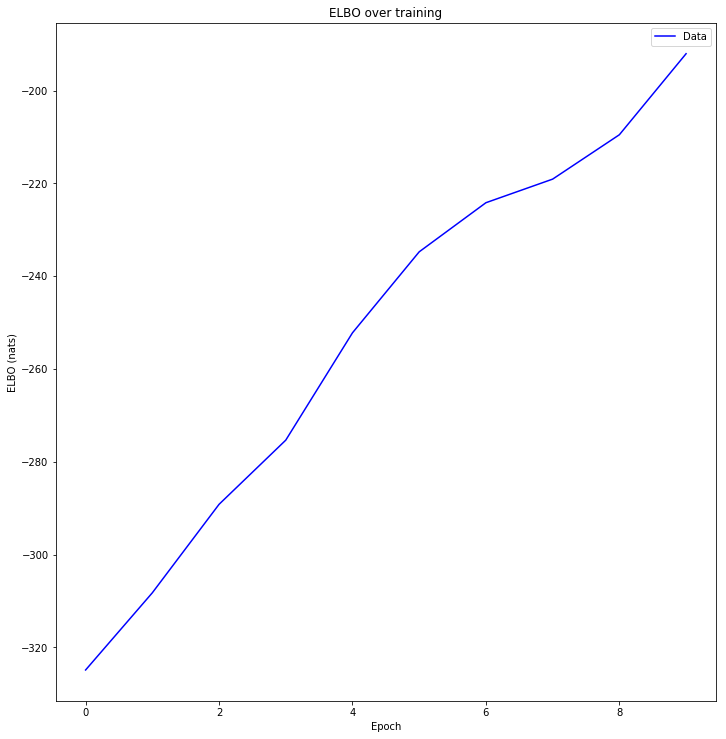

In [8]:
utils.plot_evidence_bounds(elbos[:, 0].cpu().detach().numpy())

In [9]:
theta, graph, log_weight = episode(render=True)

In [10]:
theta

{'dynamics': tensor([[-0.2210, -0.5732],
         [-0.2301, -0.5659],
         [-0.2308, -0.5657],
         [-0.2278, -0.5677],
         [-0.2356, -0.5618],
         [-0.2280, -0.5679],
         [-0.2260, -0.5693],
         [-0.2300, -0.5661],
         [-0.2333, -0.5636],
         [-0.2247, -0.5704]], grad_fn=<AddmmBackward>),
 'control': tensor([[-0.7734],
         [-0.7734],
         [-0.7734],
         [-0.7734],
         [-0.7734],
         [-0.7734],
         [-0.7734],
         [-0.7734],
         [-0.7734],
         [-0.7734]], grad_fn=<HardtanhBackward0>),
 't': 530}

In [11]:
log_weight

tensor([-100401.5703, -105975.5312, -100687.0156, -108201.3750,  -97385.6094,
        -100510.5156, -106271.6250, -100439.9062, -106108.7891, -106827.6484],
       grad_fn=<AddBackward0>)

In [12]:
torch.save(agent, 'examples/fep_control/fep_mountain_car_agent.dat')